
ADABOOST REGRESSOR
Mean squared error = 22.94
Explained variance score = 0.79


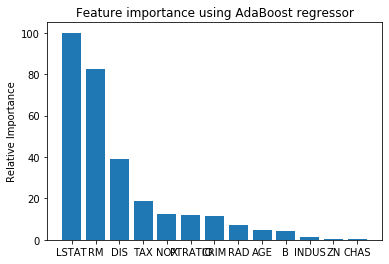

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn import model_selection
from sklearn.utils import shuffle

# Load housing data(inbuilt)
housing_data = datasets.load_boston()

# Shuffle the data so that we don't bias our analysis:
# Shuffle the data
X, y = shuffle(housing_data.data, housing_data.target, random_state=7)

# Split data into training and testing datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=7)

# Define and train an AdaBoostregressor using the Decision Tree regressor as the individual model:
# AdaBoost Regressor model
regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=400, random_state=7)
regressor.fit(X_train, y_train)

# Evaluate performance of AdaBoost regressor
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred )
print("\nADABOOST REGRESSOR")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

# This regressor has an inbuilt method that can be called to compute the relative feature importance:
# Extract feature importances
feature_importances = regressor.feature_importances_
feature_names = housing_data.feature_names

# Normalize the importance values
feature_importances = 100.0 * (feature_importances /
max(feature_importances))

# Sort them so that they can be plotted:
# Sort the values and flip them
index_sorted = np.flipud(np.argsort(feature_importances))

# Arrange the ticks on the X axis for the bar graph:
# Arrange the X ticks
pos = np.arange(index_sorted.shape[0]) + 0.5

# Plot the bar graph
plt.figure()
plt.bar(pos, feature_importances[index_sorted], align='center')
plt.xticks(pos, feature_names[index_sorted])
plt.ylabel('Relative Importance')
plt.title('Feature importance using AdaBoost regressor')
plt.show()